# Task 4

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse 

G = pd.read_pickle('bigger_graph.pickle')
G

Number of nodes: 2767
Number of edges: 229384
Average degree: 165.79978315865557
Is the graph connected? True
Number of connected components: 1


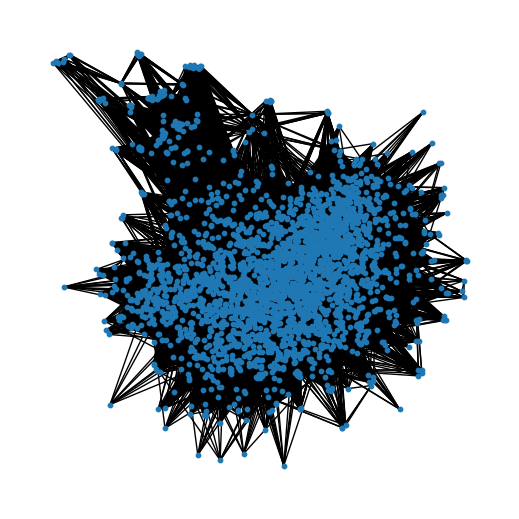

In [2]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
degrees = [G.degree(n) for n in G.nodes()]
print(f"Average degree: {sum(degrees) / len(degrees)}")
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")

plt.figure(figsize=(5, 5)) 
pos = nx.spring_layout(G)
nx.draw(G, pos , with_labels=False, node_size=10)
plt.show()

In [3]:
def recommend_songs_weighted(graph, input_song, num_recommendations=5):
    recommended_songs = []

    if input_song in graph.nodes:
        current_song = input_song
        visited = set([current_song])
        
        while len(recommended_songs) < num_recommendations:
            neighbors = list(graph[current_song])
            neighbor_weights = [(neighbor, graph.edges[current_song, neighbor]['weight']) for neighbor in neighbors if neighbor not in visited]
            
            if not neighbor_weights:
                break
            
            # Sort neighbors by edge weights in descending order
            neighbor_weights.sort(key=lambda x: x[1], reverse=True)
            
            next_song = neighbor_weights[0][0]
            recommended_songs.append((next_song, neighbor_weights[0][1]))
            visited.add(next_song)
            current_song = next_song
        
        return recommended_songs
    else:
        print("Input song not found in the graph.")
        return None


input_song = "spotify:track:6yHkPtl6UQ7RjtJLBPzbJw"  
num_recommendations = 5 
recommended_songs_weighted = recommend_songs_weighted(G, input_song, num_recommendations)
print("Recommended songs:")
for song in recommended_songs_weighted:
    print(song)

Recommended songs:
('spotify:track:0dA2Mk56wEzDgegdC6R17g', 3)
('spotify:track:0CcQNd8CINkwQfe1RDtGV6', 5)
('spotify:track:152lZdxL1OR0ZMW6KquMif', 4)
('spotify:track:3kxfsdsCpFgN412fpnW85Y', 8)
('spotify:track:7hDc8b7IXETo14hHIHdnhd', 6)


In [5]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import time
import pandas as pd

SPOTIPY_CLIENT_ID = '2c79005a25ff450fa2c58921fbfe370f'
SPOTIPY_CLIENT_SECRET = 'e6576447735343e28e391f30a16a9204'
SPOTIPY_REDIRECT_URI = 'http://localhost:3000'

# Define the scope of access
scope = "user-read-private"

# an instance of SpotifyOAuth
oauth = SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
                     client_secret=SPOTIPY_CLIENT_SECRET,
                     redirect_uri=SPOTIPY_REDIRECT_URI,
                     scope=scope)

# an instance of Spotipy with the OAuth handler
sp = spotipy.Spotify(auth_manager=oauth)

G = pd.read_pickle('bigger_graph.pickle')

#the nodes in the graph G are Spotify track IDs
for node in G.nodes():
    # Getting track information from Spotify API
    track_info = sp.track(node)
    audio_features = sp.audio_features(node)[0]

    properties = {
        'name': track_info['name'],
        'popularity': track_info['popularity'],
        'duration_ms': track_info['duration_ms'],
        'danceability': audio_features['danceability'],
        'energy': audio_features['energy'],
        'key': audio_features['key'],
        'loudness': audio_features['loudness'],
        'mode': audio_features['mode'],
        'speechiness': audio_features['speechiness'],
        'acousticness': audio_features['acousticness'],
        'instrumentalness': audio_features['instrumentalness'],
        'liveness': audio_features['liveness'],
        'valence': audio_features['valence'],
        'tempo': audio_features['tempo']
    }
    
    # Add these properties to the node in the graph
    G.nodes[node]['properties'] = properties

    time.sleep(0.1)


Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=0Nk7bSn0MItonkR0GNs3mj:
 Max Retries, reason: too many 429 error responses

In [8]:
import numpy as np
import spotipy.exceptions

# Define the features you want to keep
features_to_keep = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness']

# Get the nodes (track IDs) and split them into batches of 100
nodes = list(G.nodes())
batches = np.array_split(nodes, np.ceil(len(nodes)/100))

for batch in batches:
    # Convert the batch to a list
    batch = list(batch)

    try:
        # Get the audio features for the tracks in the batch
        audio_features_list = sp.audio_features(batch)

        for audio_features in audio_features_list:
            if audio_features is not None:
                track_id = audio_features['id']

                # Filter the audio features
                filtered_features = {feature: audio_features[feature] for feature in features_to_keep}

                # Add these properties to the node in the graph
                G.nodes[track_id]['properties'] = filtered_features

        # Sleep for 30 seconds
        time.sleep(30)
    except spotipy.exceptions.SpotifyException as e:
        if e.http_status == 429:
            print("Rate limit exceeded. Sleeping for 60 seconds.")
            time.sleep(60)
        else:
            raise


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


Max Retries reached


Rate limit exceeded. Sleeping for 60 seconds.


KeyboardInterrupt: 